# Colab Setting

In [1]:
import os
from google.colab import drive
# mount Google drive
drive.mount('/content/drive')


# by default everything gets executed and saved in 'Berkeley Capstone (Students)'
notebook_path = '/content/drive/MyDrive/Berkeley Capstone (Students)/Code' # WK
# notebook_path = '/content/drive/MyDrive/Capstone/Berkeley Capstone (Students)/Code' # GQ
os.chdir(notebook_path)

!echo -e "\nCurrent directory:"
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Current directory:
/content/drive/MyDrive/Berkeley Capstone (Students)/Code


# Data Loading

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm, trange

## By Week

In [3]:
week_df = pd.read_csv('./ExtractedData/weekr4.2.csv')
week_df.head()

,starttime,endtime,user,week,role,b_unit,f_unit,dept,team,ITAdmin,...,weekendhttp_n_hackf,weekendhttp_hackf_mean_url_len,weekendhttp_hackf_mean_url_depth,weekendhttp_hackf_mean_http_c_len,weekendhttp_hackf_mean_http_c_nwords,weekendhttp_hackf_n-pc0,weekendhttp_hackf_n-pc1,weekendhttp_hackf_n-pc2,weekendhttp_hackf_n-pc3,insider
0,1.262506e+09,1.263110e+09,0,1,6,0,1,11,20,0,...,0,0,0,0,0,0,0,0,0,0
1,1.262506e+09,1.263110e+09,1,1,32,0,4,10,19,0,...,0,0,0,0,0,0,0,0,0,0
2,1.262506e+09,1.263110e+09,2,1,35,0,1,11,20,0,...,0,0,0,0,0,0,0,0,0,0
3,1.262506e+09,1.263110e+09,3,1,30,0,2,12,14,0,...,0,0,0,0,0,0,0,0,0,0
4,1.262506e+09,1.263110e+09,4,1,30,0,2,12,33,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
week_df.loc[:,'starttime'] = pd.to_datetime(week_df['starttime'])
week_df.loc[:,'endtime'] = pd.to_datetime(week_df['endtime'])
week_df.head()

,starttime,endtime,user,week,role,b_unit,f_unit,dept,team,ITAdmin,...,weekendhttp_n_hackf,weekendhttp_hackf_mean_url_len,weekendhttp_hackf_mean_url_depth,weekendhttp_hackf_mean_http_c_len,weekendhttp_hackf_mean_http_c_nwords,weekendhttp_hackf_n-pc0,weekendhttp_hackf_n-pc1,weekendhttp_hackf_n-pc2,weekendhttp_hackf_n-pc3,insider
0,1970-01-01 00:00:01.262505600,1970-01-01 00:00:01.263110400,0,1,6,0,1,11,20,0,...,0,0,0,0,0,0,0,0,0,0
1,1970-01-01 00:00:01.262505600,1970-01-01 00:00:01.263110400,1,1,32,0,4,10,19,0,...,0,0,0,0,0,0,0,0,0,0
2,1970-01-01 00:00:01.262505600,1970-01-01 00:00:01.263110400,2,1,35,0,1,11,20,0,...,0,0,0,0,0,0,0,0,0,0
3,1970-01-01 00:00:01.262505600,1970-01-01 00:00:01.263110400,3,1,30,0,2,12,14,0,...,0,0,0,0,0,0,0,0,0,0
4,1970-01-01 00:00:01.262505600,1970-01-01 00:00:01.263110400,4,1,30,0,2,12,33,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
week_df.shape

(67166, 668)

## By Day

In [ ]:
day_df = pd.read_csv('./ExtractedData/dayr4.2.csv')

In [ ]:
day_df.shape

(330452, 508)

# EDA

In [6]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 25.9 MB 708 kB/s
     |████████████████████████████████| 10.9 MB 9.4 MB/s 
     |████████████████████████████████| 596 kB 47.4 MB/s 
     |████████████████████████████████| 102 kB 10.5 MB/s 
     |████████████████████████████████| 690 kB 48.3 MB/s 
     |████████████████████████████████| 4.7 MB 29.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 54.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=ee713049649a6ab72233b65e632d36e89812053e12d25e237912d1f81e5fdeee
  Stored in directory: /tmp/pip-ephem-wheel-cache-3eua3vxr/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6352be95b3b649205fd354aa93a417fc12cadeaedf1384653237b61f90dcb6d6
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(week_df, title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:406: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/model/summary_algorithms.py:82: UserWarning: Discarding nonzero nanoseconds in conversion
  return fn(config, series, summary)


In [6]:
def get_features(df, removed_cols):
    x_cols = [i for i in df.columns if i not in removed_cols]
    return x_cols

removed_cols = ['user','day','week','starttime','endtime','sessionid','insider']
feature_names = get_features(week_df, removed_cols)
data = week_df[feature_names]

In [7]:
stats = data.std(axis=0).reset_index()
stats.rename(columns={'index': 'feature', 0: 'std'}, inplace=True)
stats['mean'] = data.mean(axis=0).reset_index()[0]
stats['cv'] = stats['std'] / stats['mean']
stats['cv'] = stats['cv'].fillna(0)

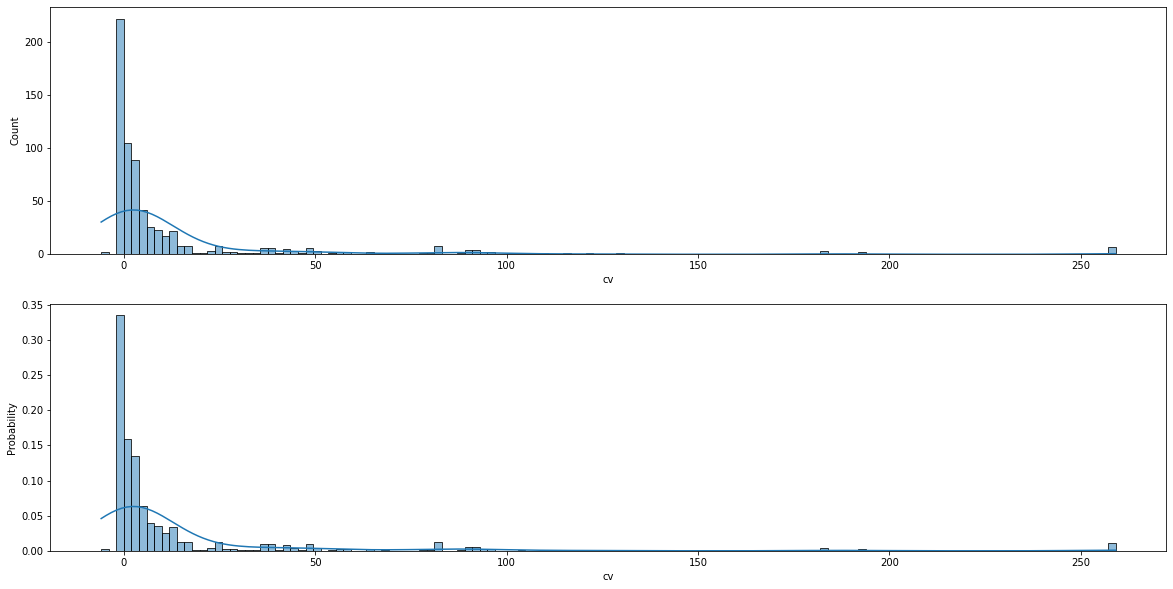

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.histplot(stats['cv'], kde=True)

plt.subplot(2,1,2)
sns.histplot(stats['cv'], stat='probability', kde=True)
plt.show();

,feature,std,mean,cv
1,b_unit,0.0,0.0,0.0
30,weekendallact_n-pc3,0.0,0.0,0.0
50,weekendlogon_n-pc3,0.0,0.0,0.0
54,usb_n-pc1,0.0,0.0,0.0
60,workhourusb_n-pc1,0.0,0.0,0.0
...,...,...,...,...
658,weekendhttp_hackf_mean_http_c_nwords,0.0,0.0,0.0
659,weekendhttp_hackf_n-pc0,0.0,0.0,0.0
660,weekendhttp_hackf_n-pc1,0.0,0.0,0.0
661,weekendhttp_hackf_n-pc2,0.0,0.0,0.0


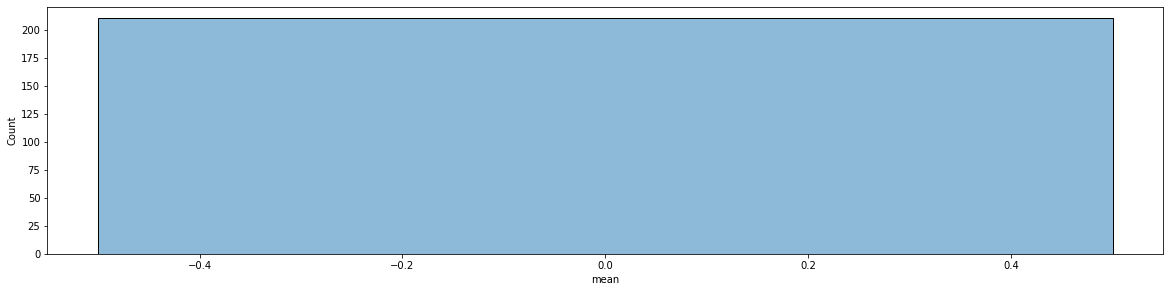

In [9]:
stats_sel = stats[stats['cv']==0]

plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.histplot(stats_sel['mean'], kde=True)
stats_sel

In [10]:
stats_sel = stats[stats['cv']>=100]
print("Number of features with cv >= 100: ", stats_sel.shape[0])
stats_sel

Number of features with cv >= 100:  17


,feature,std,mean,cv
20,workhourallact_n-pc3,0.014437,0.000119,121.209658
40,workhourlogon_n-pc3,0.008628,0.000074,115.898231
84,file_n-pc3,0.008628,0.000045,193.168320
124,file_docf_n-pc3,0.007717,0.000030,259.164041
134,file_txtf_n-pc3,0.003859,0.000015,259.164041
224,afterhourfile_n-pc3,0.008628,0.000045,193.168320
264,afterhourfile_docf_n-pc3,0.007717,0.000030,259.164041
274,afterhourfile_txtf_n-pc3,0.003859,0.000015,259.164041
350,weekendfile_exef_n-disk1,0.007717,0.000060,129.579126
353,weekendfile_exef_n-pc2,0.005457,0.000030,183.255286


In [11]:
print("25% percentile of mean: ", stats['mean'].quantile(0.25))
print("50% percentile of mean: ", stats['mean'].quantile(0.5))
print("75% percentile of mean: ", stats['mean'].quantile(0.75))
print("80% percentile of mean: ", stats['mean'].quantile(0.8))
print("85% percentile of mean: ", stats['mean'].quantile(0.85))
print("90% percentile of mean: ", stats['mean'].quantile(0.9))
print("95% percentile of mean: ", stats['mean'].quantile(0.95))

25% percentile of mean:  0.0
50% percentile of mean:  0.027156597087812286
75% percentile of mean:  2.643376112914272
80% percentile of mean:  5.878402763302866
85% percentile of mean:  13.667941659765882
90% percentile of mean:  31.20076817279419
95% percentile of mean:  89.88554395064786


In [12]:
stats_sel = stats[stats['mean']>=90]
print("Number of features with mean >= 90: ", stats_sel.shape[0])
stats_sel

Number of features with mean >= 90:  34


,feature,std,mean,cv
11,n_allact,323.331548,487.829646,0.662796
12,allact_n-pc0,322.307764,485.555966,0.663791
16,n_workhourallact,308.742890,446.987643,0.690719
17,workhourallact_n-pc0,308.620660,446.122011,0.691785
360,email_mean_email_size,2578.838675,29991.131045,0.085987
361,email_mean_email_text_slen,20.850695,355.677913,0.058622
374,workhouremail_mean_email_size,2836.063668,29978.836145,0.094602
375,workhouremail_mean_email_text_slen,23.492814,355.537669,0.066077
388,afterhouremail_mean_email_size,15382.147203,12463.322872,1.234193
389,afterhouremail_mean_email_text_slen,177.955776,147.609851,1.205582


In [13]:
print("25% percentile of std: ", stats['std'].quantile(0.25))
print("50% percentile of std: ", stats['std'].quantile(0.5))
print("75% percentile of std: ", stats['std'].quantile(0.75))
print("80% percentile of std: ", stats['std'].quantile(0.8))
print("85% percentile of std: ", stats['std'].quantile(0.85))
print("90% percentile of std: ", stats['std'].quantile(0.9))
print("95% percentile of std: ", stats['std'].quantile(0.95))

25% percentile of std:  0.0
50% percentile of std:  0.25063766399208054
75% percentile of std:  7.358706555197456
80% percentile of std:  12.457444830985844
85% percentile of std:  20.660506485586
90% percentile of std:  34.98106440444523
95% percentile of std:  118.99898274534847


In [14]:
stats_sel = stats[stats['mean']>=119]
print("Number of features with mean >= 119: ", stats_sel.shape[0])
stats_sel

Number of features with mean >= 119:  29


,feature,std,mean,cv
11,n_allact,323.331548,487.829646,0.662796
12,allact_n-pc0,322.307764,485.555966,0.663791
16,n_workhourallact,308.742890,446.987643,0.690719
17,workhourallact_n-pc0,308.620660,446.122011,0.691785
360,email_mean_email_size,2578.838675,29991.131045,0.085987
361,email_mean_email_text_slen,20.850695,355.677913,0.058622
374,workhouremail_mean_email_size,2836.063668,29978.836145,0.094602
375,workhouremail_mean_email_text_slen,23.492814,355.537669,0.066077
388,afterhouremail_mean_email_size,15382.147203,12463.322872,1.234193
389,afterhouremail_mean_email_text_slen,177.955776,147.609851,1.205582


# Data Processing

## Get Temporal Information

In [15]:
from scipy import stats 

def get_temporal_info(df, x_cols, level="week", window=4, method='Percentile'):
    output = pd.DataFrame(columns=[level, 'user','insider']+x_cols)

    for t in trange(window+1, df[level].max()+1):
      X = df[df[level].isin([w for w in range(t-window, t)])]
      x_t = df[df[level]==t]
      user_list = set(X.user.tolist()).intersection(set(x_t.user.tolist()))

      for user in user_list:
        X_u = X[X.user == user]
        xt_u = x_t[x_t.user == user]
        xt_output = [t, user, xt_u.insider.values[0]]

        if method == 'Percentile':
            for feature in x_cols:
              pct = stats.percentileofscore(X_u[feature].values, xt_u[feature].values)
              xt_output.append(pct)
        else:
            xt_u_list = xt_u.reset_index().loc[0, x_cols].tolist()
            if method == 'Median Difference':
                X_u_list = X_u.groupby("user").median().reset_index().loc[0, x_cols].tolist()
                diff = list(map(lambda x: x[0]-x[1], zip(xt_u_list, X_u_list))) 
            elif method == 'Mean Difference':
                X_u_list = X_u.groupby("user").mean().reset_index().loc[0, x_cols].tolist()
                diff = list(map(lambda x: x[0]-x[1], zip(xt_u_list, X_u_list))) 
            xt_output = xt_output + diff

        output = output.append(dict(zip(output.columns,xt_output)), ignore_index=True)
    
    return output

## Split Dataset

In [32]:
def get_features(df, removed_cols):
    x_cols = [i for i in df.columns if i not in removed_cols]
    return x_cols

def split_dataset(data, x_cols, n_user=200, split_eval=False):

    if split_eval:
      # train : validation : test = 4:2:4
      data1stHalf = data[data.week <= max(data.week)*0.6]
      dataTest = data[data.week > max(data.week)*0.4]
    else:
      data1stHalf = data[data.week <= max(data.week)/2]
      dataTest = data[data.week > max(data.week)/2]

    selectedTrainUsers =  set(data1stHalf[data1stHalf.insider > 0]['user'])
    nUsers = np.random.permutation(list(set(data1stHalf.user) - selectedTrainUsers))
    trainUsers = np.concatenate((list(selectedTrainUsers), nUsers[:n_user-len(selectedTrainUsers)]))

    unKnownTestUsers = list(set(dataTest.user) - selectedTrainUsers)

    xTest = dataTest[dataTest.user.isin(unKnownTestUsers)][x_cols].values
    yTest = dataTest[dataTest.user.isin(unKnownTestUsers)]['insider'].values
    yTestBin = yTest > 0

    if split_eval:
      temp = data1stHalf[data1stHalf.user.isin(trainUsers)]
      data_train, data_val = temp[temp.week <= max(temp.week)*2/3], temp[temp.week > max(temp.week)*2/3]

      xTrain, yTrain = data_train[x_cols].values, data_train['insider'].values
      yTrainBin = yTrain > 0
      xVal, yVal = data_val[x_cols].values, data_val['insider'].values
      yValBin = yVal > 0

      X = np.concatenate((xTrain, xVal, xTest))
      yBin = np.concatenate((yTrainBin, yValBin, yTestBin))

      return X, yBin, xTrain, yTrainBin, xVal, yValBin, xTest, yTestBin
    else:
      xTrain, yTrain = data1stHalf[data1stHalf.user.isin(trainUsers)][x_cols].values, data1stHalf[data1stHalf.user.isin(trainUsers)]['insider'].values
      yTrainBin = yTrain > 0

      X = np.concatenate((xTrain, xTest))
      yBin = np.concatenate((yTrainBin, yTestBin))
    
      return X, yBin, xTrain, yTrainBin, xTest, yTestBin

In [33]:
# window = 4
# method = 'Percentile' #['Percentile', 'Mean Difference', 'Median Difference']
# removed_cols = ['user','day','week','starttime','endtime','sessionid','insider']

# feature_names = get_features(week_df, removed_cols)
# temp_info_df = get_temporal_info(week_df, feature_names, level="week", window=window, method=method)
# X, yBin, xTrain, yTrainBin, xTest, yTestBin = split_dataset(temp_info_df, feature_names)

In [34]:
# temp_info_df.to_csv('Percentile.csv', index = False)

removed_cols = ['user','day','week','starttime','endtime','sessionid','insider']
feature_names = get_features(week_df, removed_cols)
# temp_info_df = pd.read_csv('Percentile.csv')

X, yBin, xTrain, yTrainBin, xTest, yTestBin = split_dataset(week_df, feature_names, n_user=200)
# X, yBin, xTrain, yTrainBin, xVal, yValBin, xTest, yTestBin = split_dataset(week_df, feature_names, n_user=200, split_eval=True)

# Score

In [19]:
from sklearn.metrics import roc_curve, auc, recall_score, precision_recall_curve
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
def acu_curve(y, prob):
    
    fpr, tpr, threshold = roc_curve(y, prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, 
             tpr, 
             color = 'darkorange',
             lw = 2, 
             label = 'ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

def pr_curve(y, prob):

    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y, prob)

    #create precision recall curve
    plt.figure(figsize=(10, 10))
    plt.plot(recall, precision, color='purple')

    #add axis labels to plot
    plt.title('Precision-Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')

    #display plot
    plt.show()

# Model

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def RandomForestModel(verbose=1):

    param_rf = {'n_estimators': [100, 200, 300, 500],
                'max_depth': [4, 6, 8, 10]}

    return RandomForestClassifier(), param_rf

## XGBoost

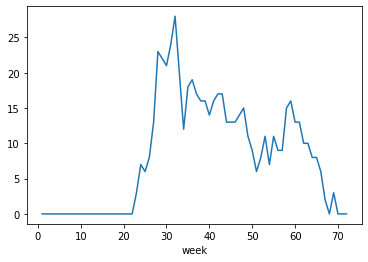

In [ ]:
week_df.groupby('week')['insider'].sum().plot()

In [ ]:
import xgboost as xgb

eval_set = [(xVal, yValBin)]

def XGBoostModel():

    param_xgb = {'n_estimators': [50, 100, 250],
                 'max_depth': [5, 10, 15, 20, 25],
                 'min_child_weight': [1, 1.5, 2, 2.5, 3],
                 'gamma': [.2, .1, .05, 0],
                 'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
                 'subsample': [0.7, 0.9],
                 'eta': [.3, .2, .1, .05, .01, .005],
                 'scale_pos_weight': [30, 60, 90, 120]}

    fit_params={"early_stopping_rounds": 15,
              "eval_metric": "logloss", #logloss with early_stopping auc_pr
              "eval_set" : eval_set
              }

    return xgb.XGBClassifier(booster='gbtree', maximize=True), [param_xgb, fit_params]

## LSTM

### Step 1 Data Processing

In [ ]:
import torch
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence,pack_padded_sequence,pack_sequence,pad_packed_sequence
from collections import defaultdict
import torch
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

df_dic = defaultdict(pd.DataFrame)
for user in week_df.user.unique():
  df_dic[user] = week_df[week_df.user == user]


sequence = []


for user, df in df_dic.items():
  input_sub = torch.tensor(df.values)
  sequence.append(input_sub)
  # input = torch.cat((input, input_sub),0)



# padded_df = pad_sequence(sequence, batch_first=True)
# packed_padded_df = pack_padded_sequence(padded_df, seq_len, batch_first=True, enforce_sorted=False)
# assert packed_padded_df[0].size() == week_df.shape)


class MyData(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(data):
    data.sort(key=lambda x: len(x), reverse=True)
    seq_len = [s.size(0) for s in data]
    padded_df = pad_sequence(data, batch_first=True, padding_value=0)
    packed_padded_df = pack_padded_sequence(padded_df, seq_len, batch_first=True)
    return packed_padded_df

# a = torch.tensor([1,2,3,4])
# b = torch.tensor([5,6,7])
# c = torch.tensor([7,8])
# d = torch.tensor([9])
# train_x = [a, b, c, d]
train_x = sequence

data = MyData(train_x)
# data = Dataset()
data_loader = DataLoader(data, batch_size=20, shuffle=True, collate_fn=collate_fn)
# 采用默认的 collate_fn 会报错
#data_loader = DataLoader(data, batch_size=2, shuffle=True) 
batch_x = iter(data_loader).next()
print(len(data_loader))

50


In [ ]:
pad_packed_sequence(batch_x, batch_first=True)[0].shape

torch.Size([20, 72, 668])

### lstm-predict GQ

In [ ]:
# import torch
# from torch import nn
# import torch.nn.functional as F

# if torch.cuda.is_available():
#     print('Found GPU')
# else:
#     print('Did not find GPU')
# device = 'gpu'

Did not find GPU


In [ ]:
import torch

# input_size = len(feature_names)      # 输入的维度，就是我们word_embedding的长度128
input_size = 1      # 输入的维度，就是我们word_embedding的长度128

hidden_size = 64      # 隐层状态的维数：（每个LSTM单元或者时间步的输出的ht的维度，单元内部有权重与偏差计算）
num_layers = 1 # RNN层的个数：（在竖直方向堆叠的多个相同个数单元的层数）
seq_len = 984 # 序列长度（100天！！！！）
batch_size = 4 # 一次喂几个users

lstm = torch.nn.LSTM(input_size, hidden_size, num_layers)
# assert input.shape = [seq_len, batch_size, input_size]      # 函数没定义，就是从data中取batch条数据，input的shape：[seq_len, batch_size, input_size]=[MAX_LEN+2, batch, 128]
output, hidden = lstm(input)      # Pytorch的LSTM会自己初始化hidden，因此hidden不写一样

output1 = output[-1]      # 取最后一层的输出作为最终输出，因为只有一层LSTM，output[-1]==output[0]
print(output.shape)
# RETURN: [seq_len, batch_size, hidden_size]

torch.Size([984, 4, 64])


In [ ]:
output.shape

torch.Size([984, 4, 64])

### lstm-supervised GQ

In [ ]:
input_demo = pad_packed_sequence(batch_x, batch_first=True)[0].shape

NameError: ignored

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, tagset_size):
        super(LSTMTagger, self).__init__()
        # self.hidden_dim = hidden_dim

        # self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_size, tagset_size)

    def forward(self, input):
        # embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(input) 
        # assert input.shape = [seq_len, batch_size, input_size] = [72, 20, 668]
        tag_space = self.hidden2tag(lstm_out)
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
input_size = 984      # 输入的维度，就是我们word_embedding的长度128
hidden_size = 64      # 隐层状态的维数：（每个LSTM单元或者时间步的输出的ht的维度，单元内部有权重与偏差计算）
num_layers = 1 # RNN层的个数：（在竖直方向堆叠的多个相同个数单元的层数）
seq_len = 72 # 序列长度（100天！！！！）
batch_size = 4 # 一次喂几个users
tagset_size = 2 # 0 / 1

model = LSTMTagger(input_size, hidden_size, num_layers, tagset_size)
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    for batch in tqdm.tqdm_notebook(data_loader):
        inputs = batch
        # inputs = prepare_sequence(training_data[0][0], word_to_ix)
        tag_scores = model(inputs)
        print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for batch in tqdm.tqdm_notebook(data_loader, leave=False):
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    # inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)

NameError: ignored

### diy lstm GQ

In [ ]:
my_array = np.array(data)
input = torch.tensor(my_array)
input = input.permute(1,0,2)
input.shape

input = input.to(torch.float32)


torch.Size([984, 4, 1])

In [ ]:
class NaiveLSTM(nn.Module):
    """Naive LSTM like nn.LSTM"""
    def __init__(self, input_size: int, hidden_size: int):
        super(NaiveLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # 输入门的权重矩阵和bias矩阵
        self.w_ii = Parameter(Tensor(hidden_size, input_size))
        self.w_hi = Parameter(Tensor(hidden_size, hidden_size))
        self.b_ii = Parameter(Tensor(hidden_size, 1))
        self.b_hi = Parameter(Tensor(hidden_size, 1))

        # 遗忘门的权重矩阵和bias矩阵
        self.w_if = Parameter(Tensor(hidden_size, input_size))
        self.w_hf = Parameter(Tensor(hidden_size, hidden_size))
        self.b_if = Parameter(Tensor(hidden_size, 1))
        self.b_hf = Parameter(Tensor(hidden_size, 1))

        # 输出门的权重矩阵和bias矩阵
        self.w_io = Parameter(Tensor(hidden_size, input_size))
        self.w_ho = Parameter(Tensor(hidden_size, hidden_size))
        self.b_io = Parameter(Tensor(hidden_size, 1))
        self.b_ho = Parameter(Tensor(hidden_size, 1))
        
        # cell的的权重矩阵和bias矩阵
        self.w_ig = Parameter(Tensor(hidden_size, input_size))
        self.w_hg = Parameter(Tensor(hidden_size, hidden_size))
        self.b_ig = Parameter(Tensor(hidden_size, 1))
        self.b_hg = Parameter(Tensor(hidden_size, 1))

        self.reset_weigths()

    def reset_weigths(self):
        """reset weights
        """
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            init.uniform_(weight, -stdv, stdv)

    def forward(self, inputs: Tensor, state: Tuple[Tensor]) \
        -> Tuple[Tensor, Tuple[Tensor, Tensor]]:
#       ->用来提示该函数返回值的数据类型
        """Forward
        Args:
            inputs: [1, 1, input_size]
            state: ([1, 1, hidden_size], [1, 1, hidden_size])
        """

#         batch_size, seq_size , _ = inputs.size()

        if state is None:
            h_t = torch.zeros(1, self.hidden_size).t()
            c_t = torch.zeros(1, self.hidden_size).t()
        else:
            (h, c) = state
            h_t = h.squeeze(0).t()
            c_t = c.squeeze(0).t()

        hidden_seq = []

        seq_size = 1
        for t in range(seq_size):
            x = inputs[:, t, :].t()
            # input gate
            i = torch.sigmoid(self.w_ii @ x + self.b_ii + self.w_hi @ h_t +
                              self.b_hi)
            # forget gate
            f = torch.sigmoid(self.w_if @ x + self.b_if + self.w_hf @ h_t +
                              self.b_hf)
            # cell
            g = torch.tanh(self.w_ig @ x + self.b_ig + self.w_hg @ h_t
                           + self.b_hg)
            # output gate
            o = torch.sigmoid(self.w_io @ x + self.b_io + self.w_ho @ h_t +
                              self.b_ho)
            
            c_next = f * c_t + i * g
            h_next = o * torch.tanh(c_next)
            c_next_t = c_next.t().unsqueeze(0)
            h_next_t = h_next.t().unsqueeze(0)
            hidden_seq.append(h_next_t)

        hidden_seq = torch.cat(hidden_seq, dim=0)
        return hidden_seq, (h_next_t, c_next_t)


### ?

In [ ]:
# 10：输入数据维度大小  20 ：隐状态的特征维度  2：层数，表示用来两层lstm
lstm = nn.LSTM(10, 20, 2)
# 5：序列长度 3：单个训练数据长度  10：单个序列维度  举个例子：每次运行时取3个含有5个字的句子（且句子中每个字的维度为10）
input = Variable(torch.randn(5, 3, 10))
# 2个LSTM层，batch_size=3, 隐藏层的特征维度20
h0 = Variable(torch.randn(2, 3, 20))
# 2个LSTM层，batch_size=3, 隐藏层的特征维度20
# 这里有2层lstm，output是最后一层lstm的每个词向量对应隐藏层的输出,其与层数无关，只与序列长度相关

c0 = Variable(torch.randn(2, 3, 20))
# 
# output, hn = lstm(input, (h0, c0))

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # 2 for bidirection 

    def forward(self, x):

        # Forward propagate RNN
        out, _ = self.lstm(x)

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

rnn = RNN(input_size, hidden_size, num_layers, num_classes)
# rnn.cuda()

## Isolation Forest

In [45]:
from sklearn.ensemble import IsolationForest

def IsolationForestModel(xTrain, yTrainBin):
    IF = IsolationForest(n_estimators=200, 
                         max_samples=256)
    IF.fit(xTrain)
    IF_score = IF.decision_function(xTrain)
    print('Detection rate at different budgets:')
    for ib in [0.001, 0.01, 0.05, 0.1, 0.2]:
        threshold = np.percentile(IF_score, 100*ib)
        flagged = np.where(IF_score<threshold)[0]
        dr = sum(yTrainBin[flagged]>0)/sum(yTrainBin>0)
        print(f'{100*ib}%, DR = {100*dr:.2f}%')

## AutoEncoder

In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics.pairwise import paired_distances
from sklearn.preprocessing import StandardScaler

def AutoEncoderModel(xTrain):
    
    scaler = StandardScaler()
    xTrain = scaler.fit_transform(xTrain)

    l = len(feature_names)
    ae = MLPRegressor(hidden_layer_sizes = (int(l/4), int(l/8), int(l/4)),
                      activation = 'tanh',
                      max_iter = 50, 
                      random_state = 10)

    ae.fit(xTrain, xTrain)
    reconstructionError = paired_distances(xTrain, ae.predict(xTrain))
    return reconstructionError

# Unsupervised Baseline

In [37]:
def investigation(yBin, score, budgets, ret):
    threshold = np.percentile(score, 100-100*budgets)
    flagged = np.where(score <=threshold)[0]
    yIB = yBin.copy()
    yIB[flagged] = 0
    if not ret:
        dr = sum(yIB)/sum(yBin)
        return dr
    else:
        return yIB

In [50]:
AE_baseline = AutoEncoderModel(xTrain)
# acu_curve(yBin, AE_baseline)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [51]:
AE_baseline_dr = []
for ib in [0.001, 0.01, 0.05, 0.1, 0.2]:
    dr = investigation(yTrainBin, AE_baseline, ib, ret = False)
    AE_baseline_dr.append(dr)
    print(f'{100*ib}%, DR = {100*dr:.2f}%')
    

0.1%, DR = 2.54%
1.0%, DR = 7.63%
5.0%, DR = 26.27%
10.0%, DR = 33.90%
20.0%, DR = 58.47%


In [52]:
IsolationForestModel(X, yBin)

Detection rate at different budgets:
0.1%, DR = 0.00%
1.0%, DR = 1.05%
5.0%, DR = 6.67%
10.0%, DR = 24.56%
20.0%, DR = 66.32%


# Unsupervised Investigation Budget 

In [ ]:
AE_IB = AutoEncoderModel(xTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Validation

- Average precision [AP](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. Simply the area under the precision-recall curve.
- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV.fit)

In [ ]:
from sklearn.metrics import recall_score, precision_score, classification_report, f1_score, accuracy_score, precision_recall_curve, make_scorer, average_precision_score
from sklearn.model_selection import PredefinedSplit, RandomizedSearchCV, TimeSeriesSplit, StratifiedKFold

def ML_train(ML_model, ML_hyper, XTrain, yTrain, fit_params={}):
    
    RS = RandomizedSearchCV(
        estimator = ML_model, 
        param_distributions = ML_hyper, 
        n_iter = 30,
        refit = "AP",
        cv = StratifiedKFold(), # TimeSeriesSplit
        # scoring=["f1_macro", "f1_micro","roc_auc", "precision", "recall"],
        scoring = {"AP": make_scorer(average_precision_score, needs_proba=True), 
                   "precision": make_scorer(precision_score), 
                   "recall": make_scorer(recall_score), 
                   "F1": make_scorer(f1_score)},
        n_jobs = -1,
        verbose = 10,
        random_state = 101)

    RS.fit(XTrain, yTrain, **fit_params)

    print('Best Parameters:')
    print(RS.best_params_)

    return RS

# Testing

In [ ]:
def prediction(ML_model, xTest, yBin, yTrainIB):

    # ML model pred
    y_ML_pred = ML_model.predict(xTest)
    # Consider the first Unsupervised model part
    y_pred = np.concatenate((yTrainIB, y_ML_pred))
    report = classification_report(yBin, y_pred, output_dict=True)

    return report['True']
    # return recall_score(yBin, y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(xTrain)
train_sc = scaler.transform(xTrain)
test_sc = scaler.transform(xTest)

In [ ]:
XGB = ML_train(XGBoostModel()[0], XGBoostModel()[1][0], xTrain, yTrainBin, XGBoostModel()[1][1])
best_XGB = XGB.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[0]	validation_0-logloss:0.607798
Will train until validation_0-logloss hasn't improved in 15 rounds.
[1]	validation_0-logloss:0.536891
[2]	validation_0-logloss:0.479721
[3]	validation_0-logloss:0.430423
[4]	validation_0-logloss:0.389647
[5]	validation_0-logloss:0.355583
[6]	validation_0-logloss:0.324794
[7]	validation_0-logloss:0.299293
[8]	validation_0-logloss:0.276893
[9]	validation_0-logloss:0.256926
[10]	validation_0-logloss:0.23905
[11]	validation_0-logloss:0.223404
[12]	validation_0-logloss:0.210575
[13]	validation_0-logloss:0.19827
[14]	validation_0-logloss:0.188878
[15]	validation_0-logloss:0.180066
[16]	validation_0-logloss:0.172278
[17]	validation_0-logloss:0.165733
[18]	validation_0-logloss:0.160059
[19]	validation_0-logloss:0.155071
[20]	validation_0-logloss:0.150944
[21]	validation_0-logloss:0.147375
[22]	validation_0-logloss:0.144621
[23]	validation_0-logloss:0.14137
[24]	validation_0-logloss:0.139999
[25]	val

In [ ]:
pd.set_option('display.max_columns', None)
print(XGB.best_index_, XGB.best_params_)
pd.DataFrame(XGB.cv_results_)

11 {'subsample': 0.7, 'scale_pos_weight': 30, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 20, 'gamma': 0.2, 'eta': 0.05, 'colsample_bytree': 0.5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_n_estimators,param_min_child_weight,param_max_depth,param_gamma,param_eta,param_colsample_bytree,params,split0_test_AP,split1_test_AP,split2_test_AP,split3_test_AP,split4_test_AP,mean_test_AP,std_test_AP,rank_test_AP,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
0,7.747487,0.467929,0.085774,0.018442,0.9,120,50,2.5,15,0.2,0.2,0.9,"{'subsample': 0.9, 'scale_pos_weight': 120, 'n...",0.958333,0.97619,0.872294,0.434524,0.363550,0.720978,0.266150,30,0.833333,1.0,1.0,0.500000,0.263158,0.719298,0.292146,27,0.833333,0.833333,0.571429,0.333333,0.833333,0.680952,0.201243,25,0.833333,0.909091,0.727273,0.400000,0.400000,0.653939,0.215236,29
1,7.369204,0.794948,0.105168,0.029663,0.9,60,50,2,25,0.1,0.2,0.5,"{'subsample': 0.9, 'scale_pos_weight': 60, 'n_...",1.000000,1.00000,0.934066,0.652513,0.433742,0.804064,0.225295,4,1.000000,1.0,1.0,0.666667,0.277778,0.788889,0.286313,12,0.833333,0.833333,0.857143,0.666667,0.833333,0.804762,0.069661,2,0.909091,0.909091,0.923077,0.666667,0.416667,0.764918,0.198755,5
2,6.805780,1.074079,0.090282,0.027226,0.9,30,100,3,15,0.1,0.2,0.5,"{'subsample': 0.9, 'scale_pos_weight': 30, 'n_...",0.944444,1.00000,0.940476,0.648704,0.357130,0.778151,0.243818,10,1.000000,1.0,1.0,0.750000,0.277778,0.805556,0.281091,5,0.833333,1.000000,0.857143,0.500000,0.833333,0.804762,0.164544,2,0.909091,1.000000,0.923077,0.600000,0.416667,0.769767,0.223349,3
3,3.777310,0.067379,0.080228,0.006534,0.7,120,100,2.5,10,0.1,0.05,0.3,"{'subsample': 0.7, 'scale_pos_weight': 120, 'n...",0.842262,1.00000,0.982143,0.615010,0.338769,0.755637,0.249831,24,1.000000,1.0,1.0,0.666667,0.222222,0.777778,0.306312,17,0.666667,0.833333,0.857143,0.333333,0.666667,0.671429,0.187113,27,0.800000,0.909091,0.923077,0.444444,0.333333,0.681989,0.245607,25
4,3.730536,0.236876,0.070117,0.003013,0.9,120,50,2,15,0.1,0.1,0.3,"{'subsample': 0.9, 'scale_pos_weight': 120, 'n...",0.944444,1.00000,0.982143,0.621407,0.297740,0.769147,0.273292,16,1.000000,1.0,1.0,0.571429,0.166667,0.747619,0.334556,25,0.666667,0.833333,0.857143,0.666667,0.500000,0.704762,0.130062,21,0.800000,0.909091,0.923077,0.615385,0.250000,0.699510,0.250256,21
5,7.326383,0.766821,0.070675,0.003914,0.9,120,250,2,25,0.05,0.1,0.9,"{'subsample': 0.9, 'scale_pos_weight': 120, 'n...",0.958333,0.97619,0.882784,0.441731,0.366276,0.725063,0.265089,29,0.833333,1.0,1.0,0.500000,0.263158,0.719298,0.292146,27,0.833333,0.833333,0.571429,0.333333,0.833333,0.680952,0.201243,25,0.833333,0.909091,0.727273,0.400000,0.400000,0.653939,0.215236,29
6,6.720028,0.379486,0.069326,0.003139,0.9,90,250,2.5,5,0.2,0.005,0.9,"{'subsample': 0.9, 'scale_pos_weight': 90, 'n_...",0.944444,0.97619,0.892857,0.453563,0.390287,0.731468,0.254924,26,1.000000,1.0,1.0,0.333333,0.263158,0.719298,0.344504,27,0.833333,0.833333,0.857143,0.333333,0.833333,0.738095,0.202591,15,0.909091,0.909091,0.923077,0.333333,0.400000,0.694918,0.268893,23
7,3.695229,0.098475,0.077795,0.004522,0.9,60,50,1,20,0.2,0.005,0.3,"{'subsample': 0.9, 'scale_pos_weight': 60, 'n_...",1.000000,1.00000,0.948052,0.750556,0.332631,0.806248,0.254009,3,1.000000,1.0,1.0,0.714286,0.250000,0.792857,0.293118,9,0.666667,0.833333,0.857143,0.833333,0.666667,0.771429,0.085978,7,0.800000,0.909091,0.923077,0.769231,0.363636,0.753007,0.203650,8
8,4.522252,0.175175,0.073497,0.003229,0.9,120,100,2,5,0.05,0.1,0.5,"{'subsample': 0.9, 'scale_pos_weight': 120, 'n...",0.958333,0.97619,0.907143,0.527372,0.274607,0.728729,0.280199,28,1.000000,1.0,1.0,0.500000,0.263158,0.752632,0.312084,21,0.833333,0.833333,0.857143,0.666667,0.83333

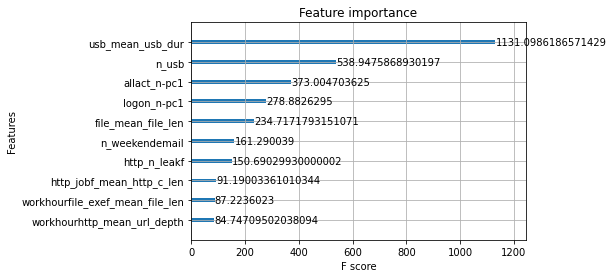

In [ ]:
xgb.plot_importance(best_XGB, max_num_features=10, importance_type='gain', show_values=True)

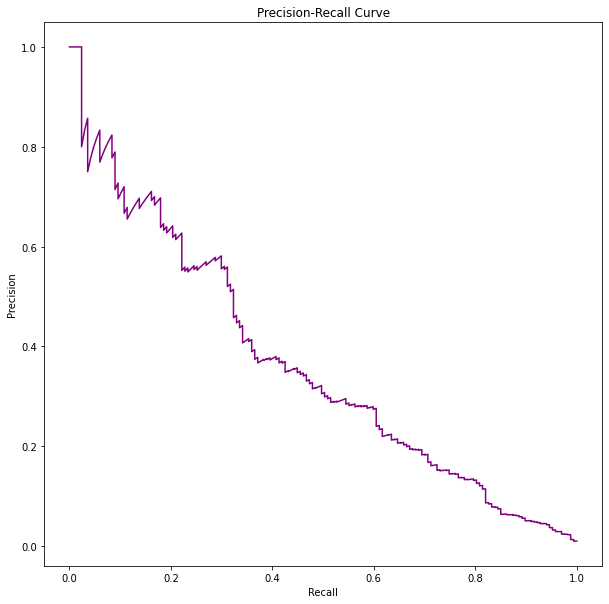

{'f1-score': 0.34529914529914535,
 'precision': 0.24162679425837322,
 'recall': 0.6047904191616766,
 'support': 167}

In [ ]:
def prediction(ML_model, x, yTrue):

    y_ML_pred = ML_model.predict(x)
    report = classification_report(yTrue, y_ML_pred, output_dict=True)

    y_score = ML_model.predict_proba(x)
    pr_curve(yTrue, pd.DataFrame(y_score)[1])

    return report['True']

XGB_metrics = prediction(XGB, test_sc, yTestBin)
XGB_metrics

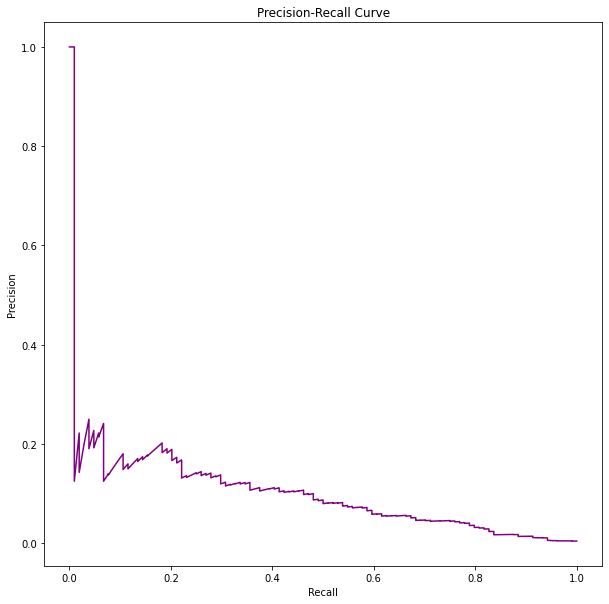

{'f1-score': 0.12286002014098689,
 'precision': 0.0686164229471316,
 'recall': 0.5865384615384616,
 'support': 104}

In [ ]:
def prediction(ML_model, x, yTrue):

    y_ML_pred = ML_model.predict(x)
    report = classification_report(yTrue, y_ML_pred, output_dict=True)

    y_score = ML_model.predict_proba(xTest)
    pr_curve(yTrue, pd.DataFrame(y_score)[1])

    return report['True']

XGB_metrics = prediction(XGB, xTest, yTestBin)
XGB_metrics

In [ ]:
from collections import defaultdict

RF_pred = defaultdict(list)
XGB_pred = defaultdict(list)

for i, ib in tqdm(enumerate([0.002, 0.02, 0.1, 0.2])):
    yTrainIB = investigation(yTrainBin, AE_IB, ib, ret = True)

    RF = ML_train(RandomForestModel()[0], RandomForestModel()[1], xTrain, yTrainIB)
    XGB = ML_train(XGBoostModel()[0], XGBoostModel()[1], xTrain, yTrainIB)

    RF_metrics = prediction(RF, xTest, yBin, yTrainIB)
    XGB_metrics = prediction(XGB, xTest, yBin, yTrainIB)
    for key, values in RF_metrics.items():
      RF_pred[key].append(values)
    for key, values in XGB_metrics.items():
      XGB_pred[key].append(values)

Text(0.5, 1.0, 'F1 Score')

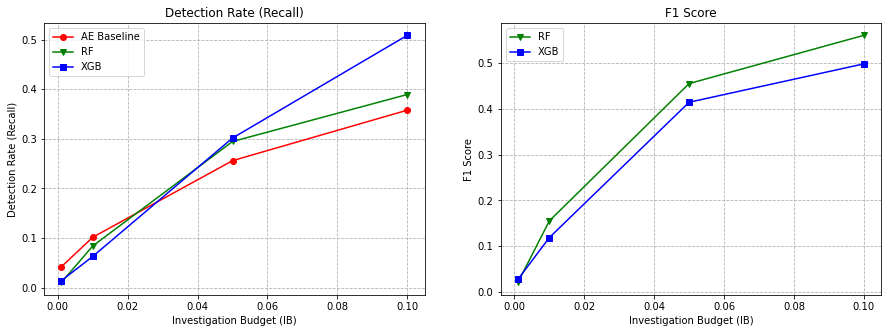

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(121)
# np.array(AE_baseline_dr)*xTrain.shape[0]/X.shape[0]
plt.plot([0.001, 0.01, 0.05, 0.1], np.array(AE_baseline_dr), color = 'r', label = 'AE Baseline', marker='o')
plt.plot([0.001, 0.01, 0.05, 0.1], RF_pred["recall"], color = 'g', label = 'RF', marker='v')
plt.plot([0.001, 0.01, 0.05, 0.1], XGB_pred["recall"], color = 'b', label = 'XGB', marker='s')

plt.grid(linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Investigation Budget (IB)')
plt.ylabel('Detection Rate (Recall)')
plt.title('Detection Rate (Recall)')

plt.subplot(122)
plt.plot([0.001, 0.01, 0.05, 0.1], RF_pred["f1-score"], color = 'g', label = 'RF', marker='v')
plt.plot([0.001, 0.01, 0.05, 0.1], XGB_pred["f1-score"], color = 'b', label = 'XGB', marker='s')

plt.grid(linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Investigation Budget (IB)')
plt.ylabel('F1 Score')
plt.title('F1 Score')

In [ ]:
RF_pred

defaultdict(list,
            {'f1-score': [0.013937282229965157,
              0.13114754098360656,
              0.425414364640884,
              0.5117493472584856],
             'precision': [1.0, 1.0, 1.0, 1.0],
             'recall': [0.007017543859649123,
              0.07017543859649122,
              0.27017543859649124,
              0.34385964912280703],
             'support': [285, 285, 285, 285]})

In [ ]:
XGB_pred

defaultdict(list,
            {'f1-score': [0.013937282229965157,
              0.09966777408637874,
              0.40860215053763443,
              0.4708333333333334],
             'precision': [1.0,
              0.9375,
              0.8735632183908046,
              0.5794871794871795],
             'recall': [0.007017543859649123,
              0.05263157894736842,
              0.26666666666666666,
              0.39649122807017545],
             'support': [285, 285, 285, 285]})